In [3]:
import pandas as pd

# Load your dataset
df = pd.read_csv('product_info.csv')


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [5]:
df.head()

,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [6]:
print(df.isnull().sum())

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64


In [7]:
# Fill missing rating with median
df['rating'].fillna(df['rating'].median(), inplace=True)

df['reviews'].fillna(df['rating'].median(), inplace=True)

In [8]:
# Fill missing size with 'Unknown' or a suitable value
df['size'].fillna('Unknown size', inplace=True)

# Fill missing variation fields with 'Unknown'
df['variation_type'].fillna('Unknown', inplace=True)
df['variation_value'].fillna('Unknown', inplace=True)
df['variation_desc'].fillna('Unknown', inplace=True)

# Fill missing price columns with the 'price_usd' column if available, else 'Unknown' or a mean value
df['value_price_usd'].fillna(df['price_usd'], inplace=True)
df['sale_price_usd'].fillna(df['price_usd'], inplace=True)


In [9]:
# Fill missing highlights with 'No highlights available'
df['highlights'].fillna('No highlights available', inplace=True)


In [10]:
# Fill missing categories with 'Unknown'
df['secondary_category'].fillna('Unknown', inplace=True)
df['tertiary_category'].fillna('Unknown', inplace=True)
# Fill missing ingredients with 'No ingredients listed'
df['ingredients'].fillna('No ingredients listed', inplace=True)
# Fill missing child price columns with 'No child price available'
df['child_max_price'].fillna('No child price available', inplace=True)
df['child_min_price'].fillna('No child price available', inplace=True)


C:\Users\ingal\AppData\Local\Temp\ipykernel_4304\4055259414.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No child price available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['child_max_price'].fillna('No child price available', inplace=True)
C:\Users\ingal\AppData\Local\Temp\ipykernel_4304\4055259414.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'No child price available' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['child_min_price'].fillna('No child price available', inplace=True)


In [11]:
# Verify if there are any remaining missing values
print(df.isnull().sum())


product_id            0
product_name          0
brand_id              0
brand_name            0
loves_count           0
rating                0
reviews               0
size                  0
variation_type        0
variation_value       0
variation_desc        0
ingredients           0
price_usd             0
value_price_usd       0
sale_price_usd        0
limited_edition       0
new                   0
online_only           0
out_of_stock          0
sephora_exclusive     0
highlights            0
primary_category      0
secondary_category    0
tertiary_category     0
child_count           0
child_max_price       0
child_min_price       0
dtype: int64


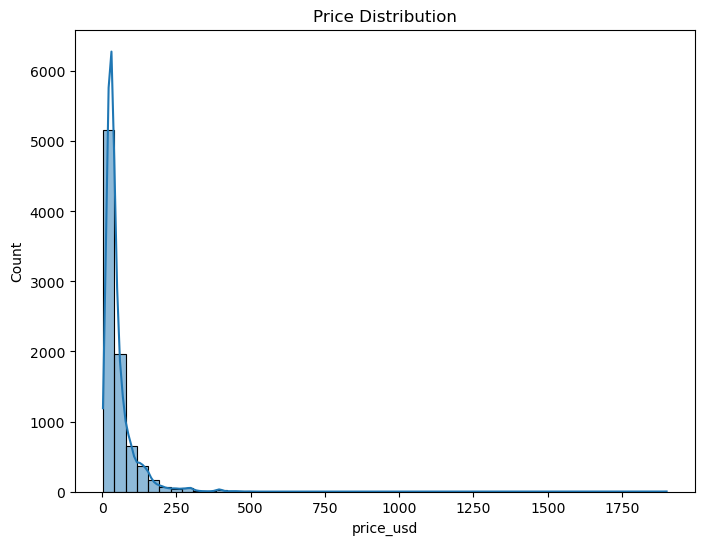

In [12]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.histplot(df['price_usd'], kde=True, bins=50)
plt.title('Price Distribution')
plt.show()


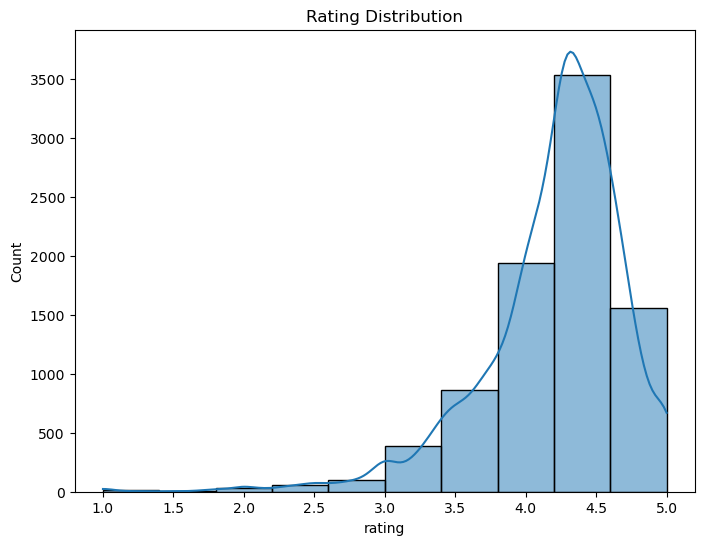

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df['rating'], kde=True, bins=10)
plt.title('Rating Distribution')
plt.show()


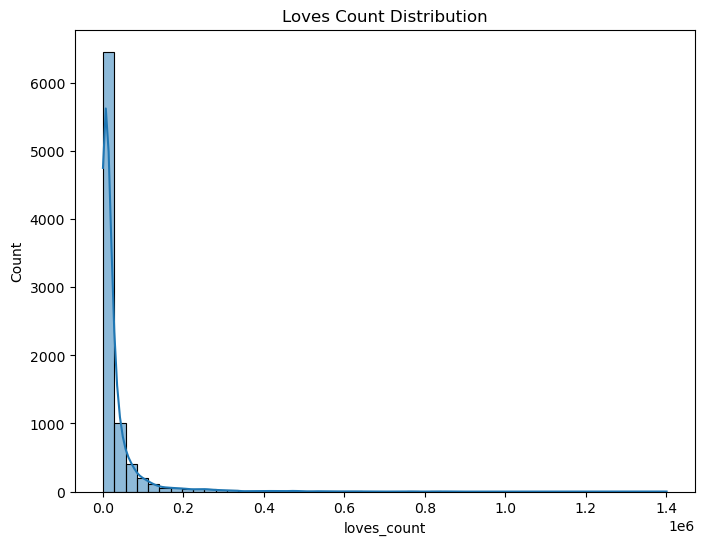

In [14]:
plt.figure(figsize=(8, 6))
sns.histplot(df['loves_count'], kde=True, bins=50)
plt.title('Loves Count Distribution')
plt.show()


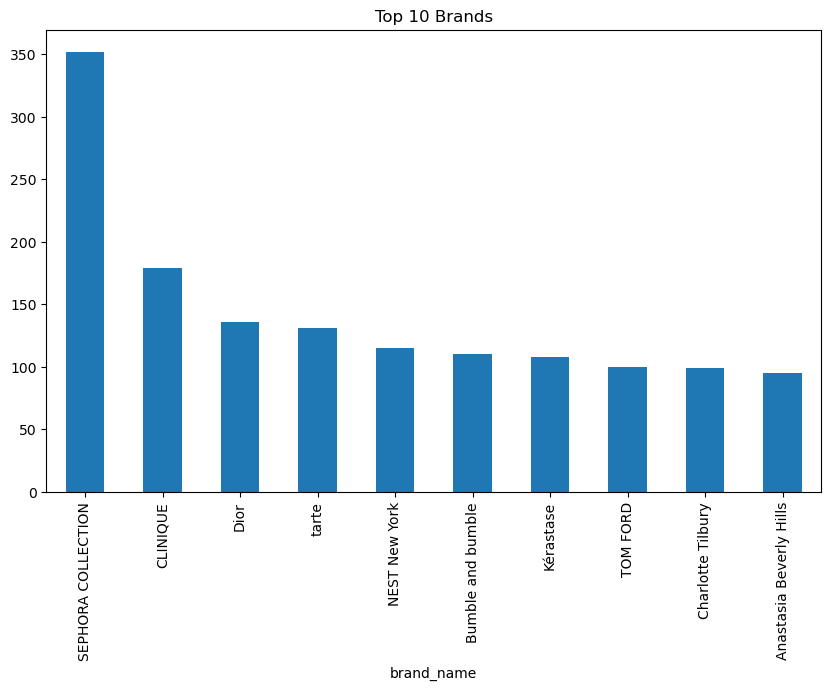

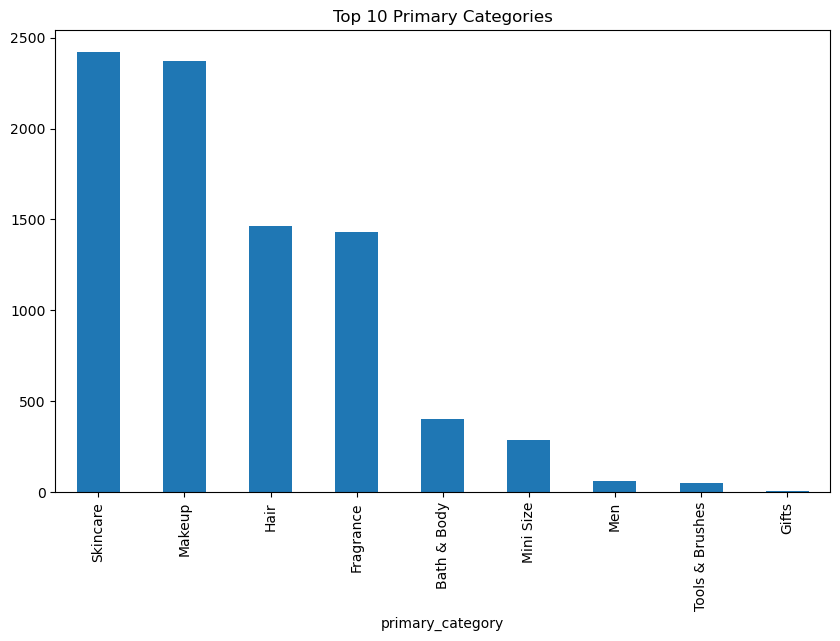

In [15]:
# Top 10 brands
plt.figure(figsize=(10, 6))
df['brand_name'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Brands')
plt.show()

# Top 10 Primary Categories
plt.figure(figsize=(10, 6))
df['primary_category'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Primary Categories')
plt.show()


In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Combine the relevant text columns into one text column
df['combined_text'] = df['product_name'] + " " + df['ingredients'] + " " + df['highlights']

# Initialize the TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)

# Apply TF-IDF to the combined text data
tfidf_matrix = tfidf.fit_transform(df['combined_text'])
print(f"TF-IDF matrix shape: {tfidf_matrix.shape}")

TF-IDF matrix shape: (8494, 5000)


In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Assuming 'primary_category' as the target variable for recommendation (you can use other categorical features)
df = df.dropna(subset=['primary_category'])

# Label encoding for the target variable (e.g., product category)
le = LabelEncoder()
df['category_encoded'] = le.fit_transform(df['primary_category'])

# Use the combined text for feature extraction
tfidf_matrix = tfidf.fit_transform(df['combined_text'])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['category_encoded'], test_size=0.3, random_state=42)

# Train an SVM classifier
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Predict the category of products in the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred, target_names=le.classes_))


                 precision    recall  f1-score   support

    Bath & Body       0.73      0.67      0.70       107
      Fragrance       0.96      0.97      0.96       416
          Gifts       0.00      0.00      0.00         1
           Hair       0.94      0.96      0.95       438
         Makeup       0.90      0.96      0.93       715
            Men       1.00      0.12      0.22        16
      Mini Size       0.56      0.06      0.11        85
       Skincare       0.90      0.96      0.93       753
Tools & Brushes       0.67      0.11      0.19        18

       accuracy                           0.91      2549
      macro avg       0.74      0.54      0.55      2549
   weighted avg       0.90      0.91      0.89      2549



C:\Users\ingal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ingal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ingal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [19]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.9074


In [20]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred, average='macro')  # Use average='micro' or 'weighted' depending on the context
print(f"Precision: {precision:.4f}")


Precision: 0.7389


C:\Users\ingal\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, y_pred, average='macro')  # Use average='micro' or 'weighted' depending on the context
print(f"Recall: {recall:.4f}")


Recall: 0.5352


In [22]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred, average='macro')  # Use average='micro' or 'weighted' depending on the context
print(f"F1-Score: {f1:.4f}")


F1-Score: 0.5544


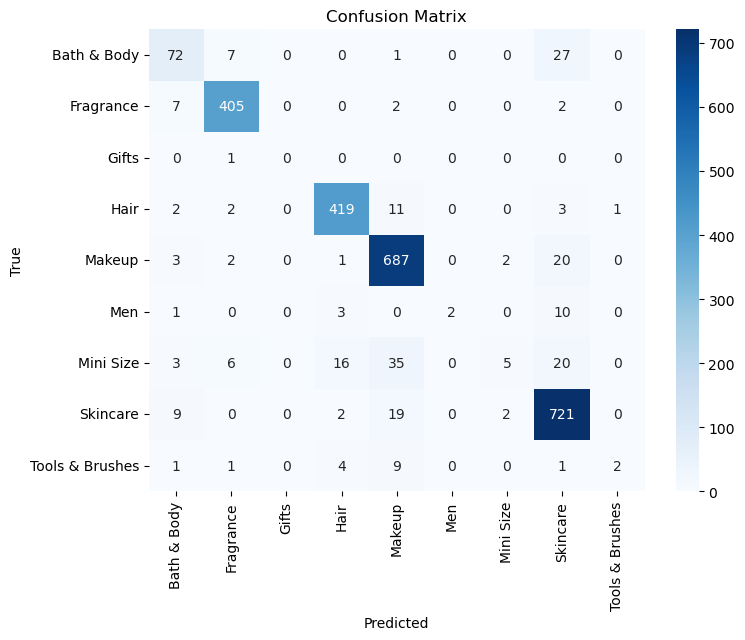

In [23]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [24]:
import pickle

# Save the SVM model
with open('svm_model.pkl', 'wb') as model_file:
    pickle.dump(svm_model, model_file)

# Save the LabelEncoder
with open('label_encoder.pkl', 'wb') as encoder_file:
    pickle.dump(le, encoder_file)

# Save the TF-IDF Vectorizer
with open('tfidf_vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
